<a href="https://colab.research.google.com/github/PritamGoyal/ham10000/blob/main/dev_paper3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
import zipfile
with zipfile.ZipFile('/content/skin-cancer-mnist-ham10000.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

100% 5.19G/5.20G [00:47<00:00, 174MB/s]
100% 5.20G/5.20G [00:47<00:00, 118MB/s]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
df=pd.read_csv("/content/dataset/HAM10000_metadata.csv")
print(df)
print(df['dx'].value_counts())
df.drop(['lesion_id','dx_type','sex','localization','age'],axis=1,inplace=True)
df = df.rename(columns={'dx': 'label'})
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df['label'] = df['label'].astype(str)
print(df['label'].value_counts())

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc

In [ ]:
import shutil

# Define paths to the source folders and the destination folder
source_folder1 = '/content/dataset/HAM10000_images_part_1'
source_folder2 = '/content/dataset/HAM10000_images_part_2'
destination_folder = '/content/images'

# Copy contents of source_folder1 to the destination_folder
shutil.copytree(source_folder1, destination_folder)

# Copy contents of source_folder2 to the destination_folder (overwrite=True to overwrite files with the same name)
shutil.copytree(source_folder2, destination_folder, dirs_exist_ok=True)


'/content/images'

In [ ]:
import zipfile
with zipfile.ZipFile('/content/folder_to_download.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/preprocessed_images')

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from scipy.ndimage import median_filter
from skimage.transform import resize

In [ ]:

df['image_path'] = df['image_id'].apply(lambda x: f'/content/images/{x}.jpg')
df['preprocessed_path'] = df['image_id'].apply(lambda x: f'/content/preprocessed_images/{x}.jpg')


os.makedirs('/content/preprocessed_images', exist_ok=True)

def preprocess_and_save_image(row):
    img = load_img(row['image_path'])
    img = img_to_array(img)
    img = resize(img, (224, 224), preserve_range=True, anti_aliasing=True)
    img = median_filter(img, size=3)  # Apply a median filter with size 3
    img = preprocess_input(img)  # Preprocess the image for ResNet50
    save_img(row['preprocessed_path'], img)

In [ ]:

df.apply(preprocess_and_save_image, axis=1)

# **Images before and after Preprocessing**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

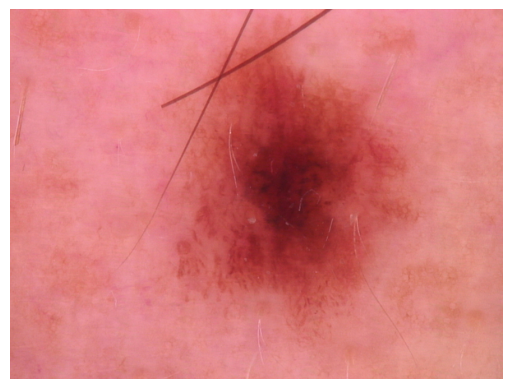

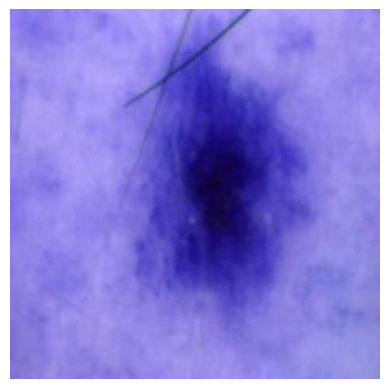

In [ ]:
img1 = mpimg.imread('/content/images/ISIC_0024306.jpg')
img2 = mpimg.imread('/content/preprocessed_images/ISIC_0024306.jpg')

plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()

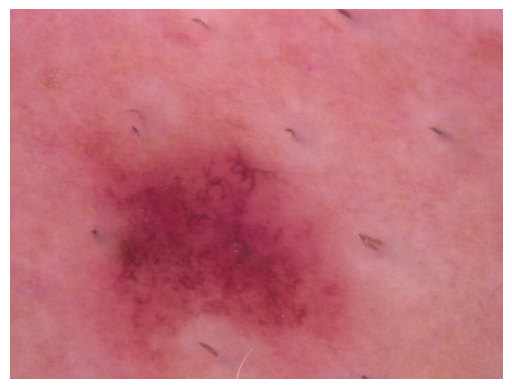

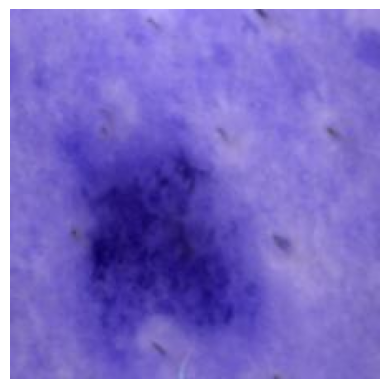

In [ ]:
img1 = mpimg.imread('/content/images/ISIC_0024309.jpg')
img2 = mpimg.imread('/content/preprocessed_images/ISIC_0024309.jpg')
plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()

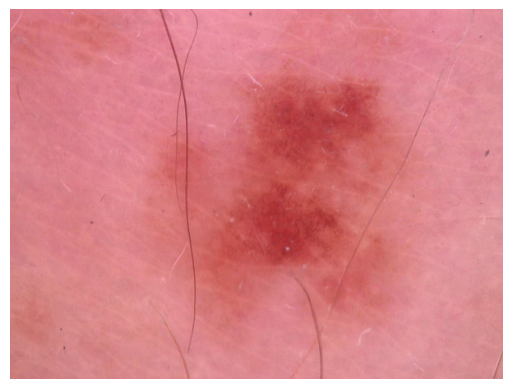

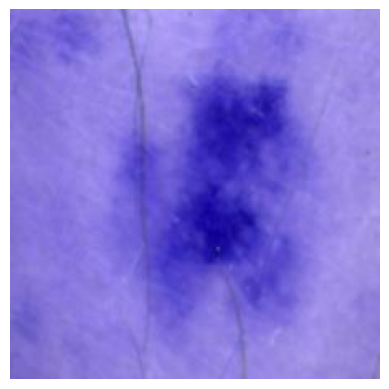

In [ ]:
img1 = mpimg.imread('/content/images/ISIC_0024307.jpg')
img2 = mpimg.imread('/content/preprocessed_images/ISIC_0024307.jpg')

plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()

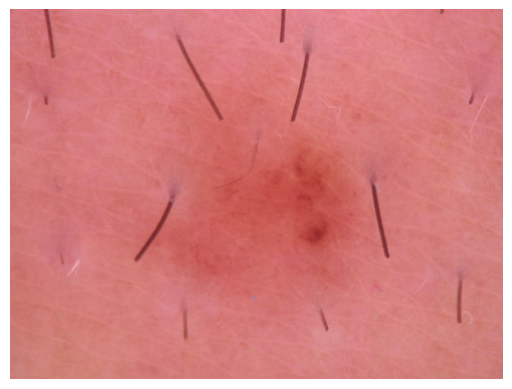

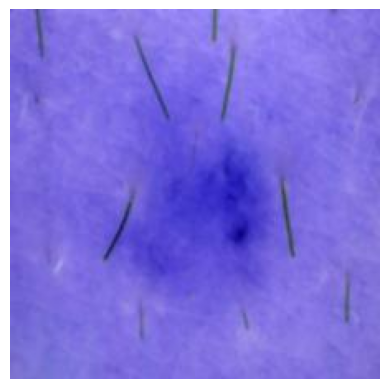

In [ ]:
img1 = mpimg.imread('/content/images/ISIC_0024321.jpg')
img2 = mpimg.imread('/content/preprocessed_images/ISIC_0024321.jpg')

plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()

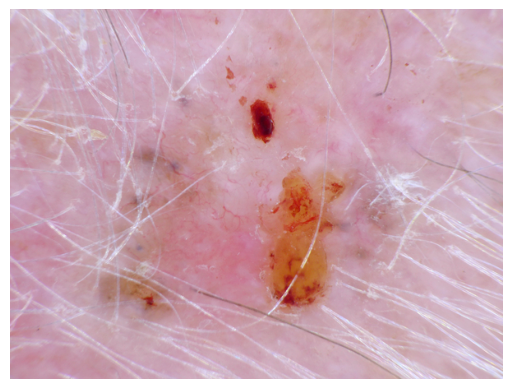

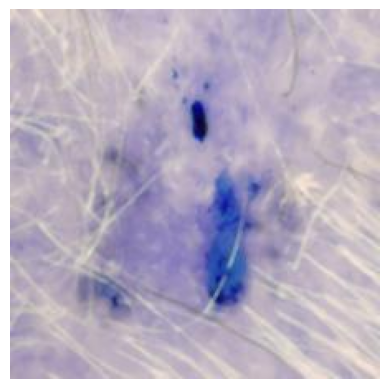

In [ ]:
img1 = mpimg.imread('/content/images/ISIC_0024504.jpg')
img2 = mpimg.imread('/content/preprocessed_images/ISIC_0024504.jpg')

plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()

# **ResNet50 Base model**

In [ ]:
df['filename'] = df['image_id'].apply(lambda x: f'{x}.jpg')


image_dir = '/content/preprocessed_images'

# Initialize the data generator with preprocessing function
datagen = ImageDataGenerator(
    validation_split=0.2  # 80% training, 20% validation
)
# Setup training and validation generators for multiclass classification with sparse labels
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load ResNet50 base model without the top layer, suited for your input size
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Assemble the model for multiclass classification
n_classes = 7
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(n_classes, activation='softmax')
])

# Compile the model for multiclass classification
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=18
)
from tensorflow.keras.models import load_model
model.save('/content/resnet50.h5')

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/18
250/250 [==============================] - 38s 117ms/step - loss: 0.7490 - accuracy: 0.7737
Epoch 2/18
250/250 [==============================] - 28s 113ms/step - loss: 0.4607 - accuracy: 0.8441
Epoch 3/18
250/250 [==============================] - 27s 109ms/step - loss: 0.4069 - accuracy: 0.8578
Epoch 4/18
250/250 [==============================] - 28s 112ms/step - loss: 0.3769 - accuracy: 0.8680
Epoch 5/18
250/250 [==============================] - 28s 112ms/step - loss: 0.3601 - accuracy: 0.8738
Epoch 6/18
250/250 [==============================] - 28s 112ms/step - loss: 0.3470 - accuracy: 0.8792
Epoch 7/18
250/250 [==============================] - 29s 116ms/step - loss: 0.3362 - accuracy: 0.8822
Epoch 8/18
250/250 [==============================] - 28s 112ms/step - loss: 0.3267 - accura

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Accuracy of the model**

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
print(f"Loss: {train_loss}, Accuracy: {train_accuracy}")

250/250 [==============================] - 29s 112ms/step - loss: 0.2665 - accuracy: 0.9081
Loss: 0.26652398705482483, Accuracy: 0.9081249833106995


In [ ]:
import torch
import torchvision.models as models
from prettytable import PrettyTable

# Load a pretrained model (example: ResNet50)
model = models.resnet50(pretrained=True)

def count_parameters(model):
    table = PrettyTable(["Layer Name", "Output Shape", "Param #"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        layer_type = str(type(parameter).__name__)
        table.add_row([name, str(list(parameter.shape)), param])
        total_params += param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

count_parameters(model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 139MB/s]


+------------------------------+--------------------+---------+
|          Layer Name          |    Output Shape    | Param # |
+------------------------------+--------------------+---------+
|         conv1.weight         |   [64, 3, 7, 7]    |   9408  |
|          bn1.weight          |        [64]        |    64   |
|           bn1.bias           |        [64]        |    64   |
|    layer1.0.conv1.weight     |   [64, 64, 1, 1]   |   4096  |
|     layer1.0.bn1.weight      |        [64]        |    64   |
|      layer1.0.bn1.bias       |        [64]        |    64   |
|    layer1.0.conv2.weight     |   [64, 64, 3, 3]   |  36864  |
|     layer1.0.bn2.weight      |        [64]        |    64   |
|      layer1.0.bn2.bias       |        [64]        |    64   |
|    layer1.0.conv3.weight     |  [256, 64, 1, 1]   |  16384  |
|     layer1.0.bn3.weight      |       [256]        |   256   |
|      layer1.0.bn3.bias       |       [256]        |   256   |
| layer1.0.downsample.0.weight |  [256, 

25557032

**Model Predictions**

1/1 [==============================] - 2s 2s/step


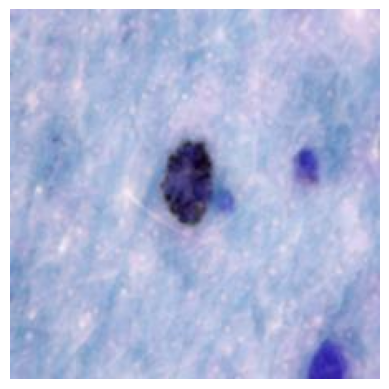

Model's Prediction: Class 6 (Probability: 0.9343736171722412)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model


image_path = '/content/preprocessed_images/ISIC_0032258.jpg'

# Load and preprocess the image
img = load_img(image_path, target_size=(224, 224))  # Resizing to match model's expected input
img_array = img_to_array(img)  # Convert the image to an array
img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_preprocessed = preprocess_input(img_array_expanded)  # Preprocess the image

# Predict the class of the image
predictions = model.predict(img_preprocessed)


predicted_class_index = np.argmax(predictions[0])
predicted_probability = predictions[0][predicted_class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"Model's Prediction: Class {predicted_class_index} (Probability: {predicted_probability})")



1/1 [==============================] - 0s 24ms/step


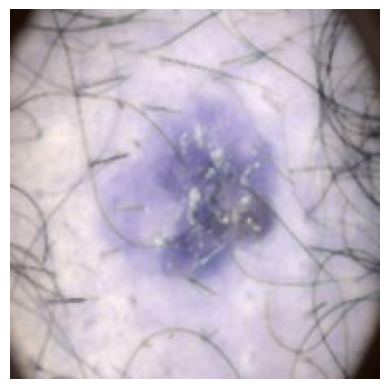

Model's Prediction: Class 5 (Probability: 0.9657496809959412)


In [ ]:
image_path = '/content/preprocessed_images/ISIC_0033550.jpg'

# Load and preprocess the image
img = load_img(image_path, target_size=(224, 224))  # Resizing to match model's expected input
img_array = img_to_array(img)  # Convert the image to an array
img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_preprocessed = preprocess_input(img_array_expanded)  # Preprocess the image

# Predict the class of the image
predictions = model.predict(img_preprocessed)


predicted_class_index = np.argmax(predictions[0])
predicted_probability = predictions[0][predicted_class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"Model's Prediction: Class {predicted_class_index} (Probability: {predicted_probability})")

**Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 7)                 14343     
                                                                 
Total params: 23602055 (90.03 MB)
Trainable params: 14343 (56.03 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


**All Layers in the model**

In [ ]:
resnet_layers = model.layers[0].layers

# Print the layers
for layer in resnet_layers:
    print(layer.name)


input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

**Weights of all the layers**

In [ ]:
# Print the weights of all layers
for layer in model.layers:
    print("Layer Name:", layer.name)
    print("Weights:", layer.get_weights())
    print("----------------------------")


Streaming output truncated to the last 5000 lines.
         [-0.00330907, -0.00051543, -0.00581124, ..., -0.0037636 ,
          -0.02398397, -0.01000349],
         [ 0.01481561, -0.00996176,  0.00611555, ..., -0.01134005,
           0.0089354 , -0.0179482 ],
         ...,
         [ 0.00206538, -0.00977799, -0.01281168, ..., -0.01303876,
          -0.01592073, -0.02198169],
         [ 0.01510699, -0.01854535, -0.00981662, ..., -0.01603035,
          -0.01194498,  0.00969215],
         [-0.02495344,  0.00140649,  0.0028938 , ..., -0.0066867 ,
           0.00118386,  0.0022928 ]]]], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.618001  , 0.6764164 , 0.395079  , ..., 0.6620828 , 0.72216284,
       0.931794  ], dtype=float32), array([-0.5503668, -0.551695 , -0.5645148, ..., -0.5156619, -0.5514126,
       -0.7469916], dtype=float32), array([-0.10156911, -0.15533464,  0.01977175, ..., -0.04616298,
       -0.06756077, -0.18653475], dtype=float32), array([0.0240

# **InceptionV3 Base Model**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Assemble the model for multiclass classification
n_classes = 7
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(n_classes, activation='softmax')
])

# Compile the model for multiclass classification
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)
from tensorflow.keras.models import load_model
model.save('/content/inceptionv3.h5')

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.
Epoch 1/10
250/250 [==============================] - 43s 155ms/step - loss: 0.7130 - accuracy: 0.7960
Epoch 2/10
250/250 [==============================] - 43s 171ms/step - loss: 0.5198 - accuracy: 0.8401
Epoch 3/10
250/250 [==============================] - 43s 171ms/step - loss: 0.4746 - accuracy: 0.8480
Epoch 4/10
250/250 [==============================] - 44s 174ms/step - loss: 0.4460 - accuracy: 0.8538
Epoch 5/10
250/250 [==============================] - 42s 168ms/step - loss: 0.4244 - accuracy: 0.8598
Epoch 6/10
250/250 [==============================] - 39s 157ms/step - loss: 0.4077 - accuracy: 0.8640
Epoch 7/10
250/250 [==============================] - 42s 166ms/step - loss: 0.3950 - accuracy: 0.8650
Epoch 8/10
250/250 [==============================] - 47s 186ms/step - loss: 0.3830 - accuracy: 0.8688
Epoch 9/10
250/250 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Accuracy of the Model**

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
print(f"Loss: {train_loss}, Accuracy: {train_accuracy}")

250/250 [==============================] - 40s 153ms/step - loss: 0.3600 - accuracy: 0.8770
Loss: 0.36002373695373535, Accuracy: 0.8769999742507935


In [ ]:
import torch
import torchvision.models as models
from prettytable import PrettyTable

# Load a pretrained InceptionV3 model
model = models.inception_v3(pretrained=True)

def count_parameters(model):
    table = PrettyTable(["Layer Name", "Output Shape", "Param #"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        layer_type = str(type(parameter).__name__)
        table.add_row([name, str(list(parameter.shape)), param])
        total_params += param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

count_parameters(model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 152MB/s]


+--------------------------------------+-------------------+---------+
|              Layer Name              |    Output Shape   | Param # |
+--------------------------------------+-------------------+---------+
|      Conv2d_1a_3x3.conv.weight       |   [32, 3, 3, 3]   |   864   |
|       Conv2d_1a_3x3.bn.weight        |        [32]       |    32   |
|        Conv2d_1a_3x3.bn.bias         |        [32]       |    32   |
|      Conv2d_2a_3x3.conv.weight       |   [32, 32, 3, 3]  |   9216  |
|       Conv2d_2a_3x3.bn.weight        |        [32]       |    32   |
|        Conv2d_2a_3x3.bn.bias         |        [32]       |    32   |
|      Conv2d_2b_3x3.conv.weight       |   [64, 32, 3, 3]  |  18432  |
|       Conv2d_2b_3x3.bn.weight        |        [64]       |    64   |
|        Conv2d_2b_3x3.bn.bias         |        [64]       |    64   |
|      Conv2d_3b_1x1.conv.weight       |   [80, 64, 1, 1]  |   5120  |
|       Conv2d_3b_1x1.bn.weight        |        [80]       |    80   |
|     

27161264

**Model Predictions**

1/1 [==============================] - 3s 3s/step


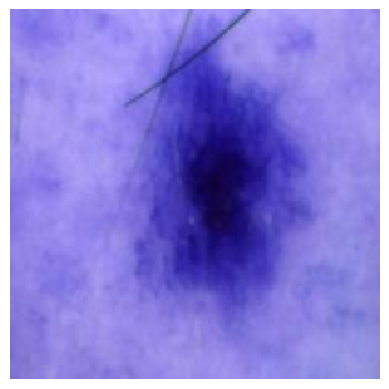

Model's Prediction: Class 5 (Probability: 0.9630246162414551)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import load_model

image_path = '/content/preprocessed_images/ISIC_0024306.jpg'

img = load_img(image_path, target_size=(299, 299))
img_array = img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_array_expanded)

# Predict the class of the image using InceptionV3
predictions = model.predict(img_preprocessed)

# Find the index of the maximum probability
predicted_class_index = np.argmax(predictions[0])
predicted_probability = predictions[0][predicted_class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"Model's Prediction: Class {predicted_class_index} (Probability: {predicted_probability})")


1/1 [==============================] - 0s 28ms/step


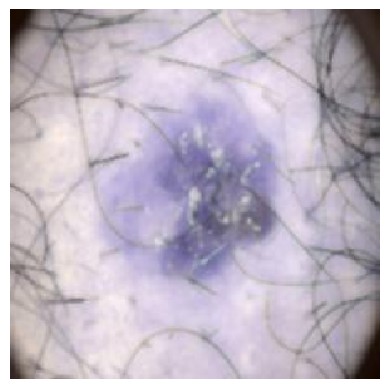

Model's Prediction: Class 5 (Probability: 0.5603271722793579)


In [ ]:
image_path = '/content/preprocessed_images/ISIC_0033550.jpg'

img = load_img(image_path, target_size=(299, 299))
img_array = img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_array_expanded)

# Predict the class of the image using InceptionV3
predictions = model.predict(img_preprocessed)

# Find the index of the maximum probability
predicted_class_index = np.argmax(predictions[0])
predicted_probability = predictions[0][predicted_class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"Model's Prediction: Class {predicted_class_index} (Probability: {predicted_probability})")

**Model Summary**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 21817127 (83.23 MB)
Trainable params: 14343 (56.03 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


**All Layers in the model**

In [ ]:
resnet_layers = model.layers[0].layers

# Print the layers
for layer in resnet_layers:
    print(layer.name)


input_3
conv2d_94
batch_normalization_94
activation_94
conv2d_95
batch_normalization_95
activation_95
conv2d_96
batch_normalization_96
activation_96
max_pooling2d_4
conv2d_97
batch_normalization_97
activation_97
conv2d_98
batch_normalization_98
activation_98
max_pooling2d_5
conv2d_102
batch_normalization_102
activation_102
conv2d_100
conv2d_103
batch_normalization_100
batch_normalization_103
activation_100
activation_103
average_pooling2d_9
conv2d_99
conv2d_101
conv2d_104
conv2d_105
batch_normalization_99
batch_normalization_101
batch_normalization_104
batch_normalization_105
activation_99
activation_101
activation_104
activation_105
mixed0
conv2d_109
batch_normalization_109
activation_109
conv2d_107
conv2d_110
batch_normalization_107
batch_normalization_110
activation_107
activation_110
average_pooling2d_10
conv2d_106
conv2d_108
conv2d_111
conv2d_112
batch_normalization_106
batch_normalization_108
batch_normalization_111
batch_normalization_112
activation_106
activation_108
activation

**Weights of all the layers**

In [ ]:
# Print the weights of all layers
for layer in model.layers:
    print("Layer Name:", layer.name)
    print("Weights:", layer.get_weights())
    print("----------------------------")


Streaming output truncated to the last 5000 lines.
        [[-6.56851567e-03,  1.20997224e-02,  3.58099677e-02, ...,
           4.83193854e-03, -2.31856592e-02, -3.84139121e-02],
         [-1.39521575e-02,  2.03453358e-02, -2.28565019e-02, ...,
          -2.55423272e-03, -3.34980362e-03, -7.89445639e-03],
         [-5.53381909e-03, -2.82207523e-02, -5.76807298e-02, ...,
           4.55435505e-03, -1.04289018e-02,  1.26639800e-02],
         ...,
         [-2.95909401e-03,  4.19526501e-03,  1.88410264e-02, ...,
           5.34881197e-04, -5.24851121e-03, -2.52288003e-02],
         [-2.37783592e-04, -4.33372566e-03,  2.23341081e-02, ...,
          -2.36093123e-02,  5.88079495e-03, -4.42339078e-04],
         [-1.18616261e-02,  9.93216969e-03, -2.10606679e-02, ...,
          -3.72721185e-03,  1.08800828e-02,  2.63197403e-02]]]],
      dtype=float32), array([-0.7171091 , -0.68360615, -0.8408483 , -0.92294866, -0.9242537 ,
       -1.1367624 , -0.91738003, -0.73734045,  0.82128185, -0.8583791 

# **VGG19 Base Model**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# Setup training and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),  # VGG19's expected input size
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

# Assemble the model for multiclass classification
n_classes = 7
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(n_classes, activation='softmax')  # Use softmax for multiclass classification
])

# Compile the model for multiclass classification
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)
from tensorflow.keras.models import load_model
model.save('/content/vgg19.h5')

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.
80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/10
250/250 [==============================] - 49s 165ms/step - loss: 1.8547 - accuracy: 0.5297
Epoch 2/10
250/250 [==============================] - 38s 150ms/step - loss: 0.8224 - accuracy: 0.8041
Epoch 3/10
250/250 [==============================] - 40s 160ms/step - loss: 0.7022 - accuracy: 0.8198
Epoch 4/10
250/250 [==============================] - 38s 152ms/step - loss: 0.6330 - accuracy: 0.8257
Epoch 5/10
250/250 [==============================] - 38s 153ms/step - loss: 0.5859 - accuracy: 0.8297
Epoch 6/10
250/250 [==============================] - 40s 158ms/step - loss: 0.5493 - accuracy: 0.8342
Epoch 7/10
250/250 [==============================] - 38s 150ms/step - loss: 0.5237 - accuracy: 0.8392
Epoch 8/10
250/250 [==============================] - 38s 151ms/step - loss: 0.5026 - accura

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Accuracy of the model**

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
print(f"Loss: {train_loss}, Accuracy: {train_accuracy}")

250/250 [==============================] - 38s 150ms/step - loss: 0.4586 - accuracy: 0.8499
Loss: 0.4586331248283386, Accuracy: 0.8498749732971191


In [ ]:
import torch
import torchvision.models as models
from prettytable import PrettyTable

# Load a pretrained model (example: VGG19)
model = models.vgg19(pretrained=True)

def count_parameters(model):
    table = PrettyTable(["Layer Name", "Output Shape", "Param #"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        layer_type = str(type(parameter).__name__)
        table.add_row([name, str(list(parameter.shape)), param])
        total_params += param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

count_parameters(model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 144MB/s]


+---------------------+------------------+-----------+
|      Layer Name     |   Output Shape   |  Param #  |
+---------------------+------------------+-----------+
|  features.0.weight  |  [64, 3, 3, 3]   |    1728   |
|   features.0.bias   |       [64]       |     64    |
|  features.2.weight  |  [64, 64, 3, 3]  |   36864   |
|   features.2.bias   |       [64]       |     64    |
|  features.5.weight  | [128, 64, 3, 3]  |   73728   |
|   features.5.bias   |      [128]       |    128    |
|  features.7.weight  | [128, 128, 3, 3] |   147456  |
|   features.7.bias   |      [128]       |    128    |
|  features.10.weight | [256, 128, 3, 3] |   294912  |
|   features.10.bias  |      [256]       |    256    |
|  features.12.weight | [256, 256, 3, 3] |   589824  |
|   features.12.bias  |      [256]       |    256    |
|  features.14.weight | [256, 256, 3, 3] |   589824  |
|   features.14.bias  |      [256]       |    256    |
|  features.16.weight | [256, 256, 3, 3] |   589824  |
|   featur

143667240

**Model Predictions**

1/1 [==============================] - 1s 1s/step


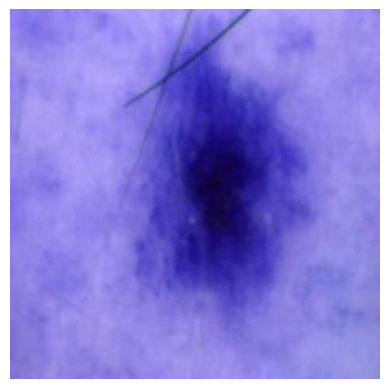

Model's Prediction: Class 5 (Probability: 0.9647741317749023)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import load_model

image_path = '/content/preprocessed_images/ISIC_0024306.jpg'

img = load_img(image_path, target_size=(224, 224))  # VGG-19 also uses 224x224 input size
img_array = img_to_array(img)  # Convert the image to an array
img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_preprocessed = preprocess_input(img_array_expanded)

predictions = model.predict(img_preprocessed)

predicted_class_index = np.argmax(predictions[0])
predicted_probability = predictions[0][predicted_class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
print(f"Model's Prediction: Class {predicted_class_index} (Probability: {predicted_probability})")


1/1 [==============================] - 0s 20ms/step


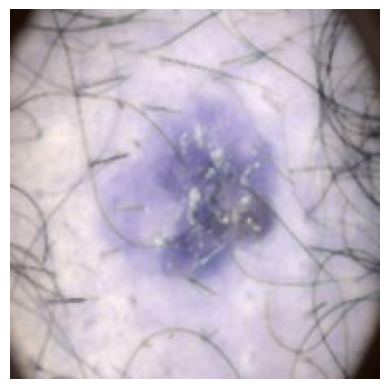

Model's Prediction: Class 5 (Probability: 0.8046389222145081)


In [ ]:
image_path = '/content/preprocessed_images/ISIC_0033550.jpg'

img = load_img(image_path, target_size=(224, 224))  # VGG-19 also uses 224x224 input size
img_array = img_to_array(img)  # Convert the image to an array
img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_preprocessed = preprocess_input(img_array_expanded)

predictions = model.predict(img_preprocessed)

predicted_class_index = np.argmax(predictions[0])
predicted_probability = predictions[0][predicted_class_index]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
print(f"Model's Prediction: Class {predicted_class_index} (Probability: {predicted_probability})")


**Model Summary**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 20027975 (76.40 MB)
Trainable params: 3591 (14.03 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


**All Layers in the model**

In [ ]:
resnet_layers = model.layers[0].layers

# Print the layers
for layer in resnet_layers:
    print(layer.name)


input_4
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


**Weights of all the layers**

In [ ]:
# Print the weights of all layers
for layer in model.layers:
    print("Layer Name:", layer.name)
    print("Weights:", layer.get_weights())
    print("----------------------------")


Layer Name: vgg19
Weights: [array([[[[ 0.34119523,  0.09563112,  0.0177449 , ..., -0.11436455,
          -0.05099866, -0.00299793],
         [ 0.46418372,  0.03355668,  0.10245045, ..., -0.06945956,
          -0.04020201,  0.04048637],
         [ 0.39416704, -0.08419707, -0.03631314, ..., -0.10720515,
          -0.03804016,  0.04690642]],

        [[ 0.33999205,  0.13363543,  0.02129423, ..., -0.13025227,
          -0.16508926, -0.06969624],
         [ 0.41810837,  0.05260524,  0.09755926, ..., -0.09385028,
          -0.20492788, -0.0573062 ],
         [ 0.37740308, -0.07876257, -0.04775979, ..., -0.11827433,
          -0.19008617, -0.01889699]],

        [[-0.04484424,  0.06471398, -0.07631404, ..., -0.12629718,
          -0.29905206, -0.2825364 ],
         [-0.04806903, -0.00658076, -0.02234544, ..., -0.0878844 ,
          -0.3915486 , -0.34632796],
         [-0.04594866, -0.11583115, -0.14462094, ..., -0.12290562,
          -0.35782176, -0.27979308]]],


       [[[ 0.23215917,  0.13

# **Why Median Filter?**
The median filter is a good approach for the Ham10000 dataset because it effectively reduces noise while preserving edges and fine details in images. This dataset consists of skin lesion images, where preserving the features and textures of the lesions is crucial for accurate analysis and diagnosis. The median filter achieves noise reduction by replacing each pixel's value with the median value of its neighboring pixels. Unlike other smoothing filters such as the mean filter, the median filter is robust to outliers and preserves the integrity of the image's structures, making it particularly suitable for medical imaging tasks where precise lesion delineation and feature preservation are essential for accurate diagnosis.

# **Why ResNet50, InceptionV3 and VGG19 as Base Models?**

1. **VGG19**:
   - **Simplicity and Uniformity**: VGG19 architecture consists of a series of convolutional layers followed by max-pooling layers, which are simple and uniform. This simplicity often makes it easier to understand and implement.
   - **Good Generalization**: Despite its simplicity, VGG19 has shown strong performance in various image classification tasks. Its uniform architecture allows it to generalize well to different datasets.
   - **Pre-Trained Weights**: VGG19 is typically pre-trained on large datasets like ImageNet, which provides a good starting point for transfer learning. Fine-tuning VGG19 on the Ham10000 dataset can lead to improved performance with less training data.

2. **ResNet50**:
   - **Residual Connections**: ResNet50 introduces residual connections that allow for deeper networks to be trained without suffering from the vanishing gradient problem. This architecture facilitates the training of very deep networks, which can capture more intricate features in the Ham10000 dataset.
   - **High Accuracy**: ResNet50 has demonstrated state-of-the-art performance on various image classification benchmarks. Its ability to effectively learn features of different scales and complexities makes it suitable for complex datasets like Ham10000.
   - **Transfer Learning**: Like VGG19, ResNet50 is often pre-trained on ImageNet, providing a strong feature extractor for transfer learning. Fine-tuning ResNet50 on the Ham10000 dataset can lead to high accuracy with relatively little training data.

3. **InceptionV3**:
   - **Efficient Feature Extraction**: InceptionV3 architecture employs inception modules that allow for efficient feature extraction at multiple scales. This enables the model to capture both fine-grained and global features in the images, which can be beneficial for classifying skin lesions with varying sizes and textures.
   - **Reduction in Parameters**: InceptionV3 reduces the number of parameters compared to traditional CNN architectures by using 1x1 convolutions and dimensionality reduction techniques. This can lead to faster training and inference times while maintaining high accuracy.
   - **Balanced Performance**: InceptionV3 strikes a balance between model complexity and performance. It offers competitive accuracy while being computationally efficient, making it suitable for resource-constrained environments or applications where inference speed is crucial.
